In [1]:
import pandas as pd
import requests

!pip install wikipedia
import wikipedia as wp


import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
#=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

  Stored in directory: /home/dsxuser/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geo

In [2]:
#import beautiful soup to extract data from web
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [3]:
#Open web page to get data of Toronto,Canada
from urllib.request import urlopen
wiki_page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
webpage = urlopen(wiki_page)
webpage

In [4]:
! pip install lxml

In [5]:
soup = BeautifulSoup(webpage, 'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":900271985,"wgRevisionId":900271985,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","S

In [6]:
table = str(soup.find("table", { "class" : "wikitable sortable" }))
df =pd.read_html(table)[0]
df.head

<bound method NDFrame.head of     Postcode           Borough  \
0        M1A      Not assigned   
1        M2A      Not assigned   
2        M3A        North York   
3        M4A        North York   
4        M5A  Downtown Toronto   
5        M5A  Downtown Toronto   
6        M6A        North York   
7        M6A        North York   
8        M7A      Queen's Park   
9        M8A      Not assigned   
10       M9A         Etobicoke   
11       M1B       Scarborough   
12       M1B       Scarborough   
13       M2B      Not assigned   
14       M3B        North York   
15       M4B         East York   
16       M4B         East York   
17       M5B  Downtown Toronto   
18       M5B  Downtown Toronto   
19       M6B        North York   
20       M7B      Not assigned   
21       M8B      Not assigned   
22       M9B         Etobicoke   
23       M9B         Etobicoke   
24       M9B         Etobicoke   
25       M9B         Etobicoke   
26       M9B         Etobicoke   
27       M1C      

In [7]:
df.columns=['Postalcode','Borough','Neighborhood']

# Ignore cells with a borough that is Not assigned.
df.drop(df.index[0], inplace=True)
df = df[df['Borough']!="Not assigned"]
#if a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df.Neighborhood[df.Neighborhood=="Not assigned"] = df.Borough[df.Neighborhood=="Not assigned"]

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
#Combined into one row with the neighborhoods separated with a comma
df=df.groupby(['Postalcode']).agg({'Borough': 'first','Neighborhood':', '.join})
df.reset_index(inplace=True)
df.head()

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [9]:
df.shape

(103, 3)

In [10]:
#Get Coordinates for Neighborhood
url="http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv"
coordinates=pd.read_csv(url)
coordinates.columns = ['Postalcode', 'Latitude', 'Longitude']
df1=pd.merge(df,coordinates,on="Postalcode")
df1

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [11]:
# Sorting
# set index for only Downtown Toronto
downtown_toronto_data = df1[df1['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
# eliminate 'Postcode' column
downtown_toronto_data=downtown_toronto_data.drop(['Postalcode'], axis=1)
downtown_toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Rosedale,43.679563,-79.377529
1,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


## New York data

In [12]:
#New York data
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
neighborhood_data=resp['features']
neighborhood_data[0]



{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [13]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [14]:
#Then let's loop through the data and fill the dataframe one row at a time.
for data in neighborhood_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

    neighborhoods.head()

In [15]:
# Creating new Dataframe manhattan_data
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [16]:
#Define FourSquare Credential and Version

CLIENT_ID = 'BRU2JD1VN44JWIEKSJGDZG2BTD2DI31AHUT4TDWVNE5N1JHN' # your Foursquare ID
CLIENT_SECRET = 'U0KPCYNBFEDXV2IW0TLGCEASLHSGDCQA4U3HVUWOUXCNNLCA' # your Foursquare Secret
VERSION = '20190712'
LIMIT = 20
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BRU2JD1VN44JWIEKSJGDZG2BTD2DI31AHUT4TDWVNE5N1JHN
CLIENT_SECRET:U0KPCYNBFEDXV2IW0TLGCEASLHSGDCQA4U3HVUWOUXCNNLCA


In [17]:
# get the geographical coordinates of Downtown Toronto
address = 'Downtown Toronto, ON, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_downtown_toronto = location.latitude
longitude_downtown_toronto = location.longitude
print("Downtown Toronto","latitude",latitude_downtown_toronto, "& " "longitude" ,longitude_downtown_toronto)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


Downtown Toronto latitude 43.655115 & longitude -79.380219


In [18]:
# Let's get the geographical coordinates of Manhattan.
address = 'Manhattan, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [19]:
# create map of Downtown Toronto using latitude and longitude values
map_downtown_toronto = folium.Map(location=[latitude_downtown_toronto,longitude_downtown_toronto], zoom_start=11)

# add markers to map
for lat, lng, label in zip(downtown_toronto_data['Latitude'], downtown_toronto_data['Longitude'], downtown_toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown_toronto)  
    
map_downtown_toronto

In [20]:

from folium import plugins
# create map of Downtown Toronto using latitude and longitude values
map_downtown_toronto = folium.Map(location=[latitude_downtown_toronto,longitude_downtown_toronto], zoom_start=11)
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_downtown_toronto)
# add markers to map
for lat, lng, label in zip(downtown_toronto_data['Latitude'], downtown_toronto_data['Longitude'], downtown_toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(incidents)  
    
map_downtown_toronto


In [21]:
# let's visualize Manhattan neighborhoods.
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [22]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

grouping = plugins.MarkerCluster().add_to(map_manhattan)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(grouping)  
    
map_manhattan



In [23]:
!pip install requests
import requests # library to handle requests

In [24]:
#get Nearby Values Function
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url,verify=False).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
# Write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.
downtown_toronto_venues = getNearbyVenues(names=downtown_toronto_data['Neighborhood'],
                                   latitudes=downtown_toronto_data['Latitude'],
                                   longitudes=downtown_toronto_data['Longitude'],
                                  )

Rosedale
Cabbagetown, St. James Town


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Church and Wellesley


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Harbourfront, Regent Park


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Ryerson, Garden District


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


St. James Town


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Berczy Park


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Central Bay Street


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Adelaide, King, Richmond


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Harbourfront East, Toronto Islands, Union Station


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Design Exchange, Toronto Dominion Centre


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Commerce Court, Victoria Hotel


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Harbord, University of Toronto


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Chinatown, Grange Park, Kensington Market


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


First Canadian Place, Underground city


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Christie


/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [26]:
# Let's check the size of the resulting dataframe
print(downtown_toronto_venues.shape)
downtown_toronto_venues.head()

(1292, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Mooredale House,43.678631,-79.380091,Building
1,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
2,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
3,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
4,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail


In [27]:
 #Let's check how many venues were returned for each neighborhood
downtown_toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,58,58,58,58,58,58
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
"Cabbagetown, St. James Town",43,43,43,43,43,43
Central Bay Street,85,85,85,85,85,85
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16
Church and Wellesley,86,86,86,86,86,86
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [28]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(downtown_toronto_venues['Venue Category'].unique())))

There are 206 uniques categories.


## Analyzing Each Neighborhood

In [29]:


# one hot encoding
downtown_toronto_onehot = pd.get_dummies(downtown_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_toronto_onehot['Neighborhood'] = downtown_toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_toronto_onehot.columns[140]] + list(downtown_toronto_onehot.columns[:140])+list(downtown_toronto_onehot.columns[141:])
downtown_toronto_onehot = downtown_toronto_onehot[fixed_columns]

downtown_toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
downtown_toronto_grouped = downtown_toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [31]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in downtown_toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_toronto_grouped[downtown_toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.07
1                 Café  0.05
2  American Restaurant  0.04
3                  Bar  0.04
4           Steakhouse  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2    Steakhouse  0.03
3          Café  0.03
4   Cheese Shop  0.03


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3             Plane  0.06
4           Airport  0.06


----Cabbagetown, St. James Town----
                venue  freq
0         Coffee Shop  0.07
1          Restaurant  0.05
2         Pizza Place  0.05
3  Italian Restaurant  0.05
4              Bakery  0.05


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.15
1                Café  0.05
2  Italian Restaurant  0.05
3      Ice Cream Sh

In [32]:
# Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_toronto_grouped['Neighborhood']

for ind in np.arange(downtown_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Gym,Burger Joint,Sushi Restaurant,Hotel
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Steakhouse,Cheese Shop,Eastern European Restaurant
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Bar,Coffee Shop,Plane,Sculpture Garden,Boutique,Boat or Ferry
3,"Cabbagetown, St. James Town",Coffee Shop,Café,Pub,Italian Restaurant,Park,Bakery,Pizza Place,Restaurant,Japanese Restaurant,Sandwich Place
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Sushi Restaurant,Bar,Japanese Restaurant
5,"Chinatown, Grange Park, Kensington Market",Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Bar,Dumpling Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Arts & Crafts Store
6,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Coffee Shop,Convenience Store,Nightclub,Restaurant,Diner
7,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gym
8,"Commerce Court, Victoria Hotel",Coffee Shop,Hotel,Café,American Restaurant,Restaurant,Deli / Bodega,Bakery,Gastropub,Seafood Restaurant,Steakhouse
9,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Café,Hotel,Italian Restaurant,Restaurant,Bar,Gastropub,Deli / Bodega,American Restaurant,Steakhouse


## Clustering Toronto neighborhoods

In [34]:

#set number of clusters
kclusters = 5

downtown_toronto_grouped_clustering = downtown_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 0, 2, 4, 0, 0, 0], dtype=int32)

In [35]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
downtown_toronto_merged = downtown_toronto_data

# add clustering labels
downtown_toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_toronto_merged = downtown_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_toronto_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Building,Dim Sum Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
1,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0,Coffee Shop,Café,Pub,Italian Restaurant,Park,Bakery,Pizza Place,Restaurant,Japanese Restaurant,Sandwich Place
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,3,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gym
3,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Mexican Restaurant,Gym / Fitness Center,Breakfast Spot,Restaurant,Pub,Café,Theater
4,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Café,Bubble Tea Shop,Restaurant,Italian Restaurant,Lingerie Store,Ice Cream Shop


In [36]:
# create map
map_clusters = folium.Map(location=[latitude_downtown_toronto, longitude_downtown_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_merged['Latitude'], downtown_toronto_merged['Longitude'], downtown_toronto_merged['Neighborhood'], downtown_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
#examine downtown toronto cluster
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 0, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rosedale,Park,Playground,Trail,Building,Dim Sum Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
1,"Cabbagetown, St. James Town",Coffee Shop,Café,Pub,Italian Restaurant,Park,Bakery,Pizza Place,Restaurant,Japanese Restaurant,Sandwich Place
3,"Harbourfront, Regent Park",Coffee Shop,Bakery,Park,Mexican Restaurant,Gym / Fitness Center,Breakfast Spot,Restaurant,Pub,Café,Theater
4,"Ryerson, Garden District",Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Café,Bubble Tea Shop,Restaurant,Italian Restaurant,Lingerie Store,Ice Cream Shop
7,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Sushi Restaurant,Bar,Japanese Restaurant
8,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Gym,Burger Joint,Sushi Restaurant,Hotel
9,"Harbourfront East, Toronto Islands, Union Station",Coffee Shop,Hotel,Aquarium,Italian Restaurant,Café,Scenic Lookout,Sporting Goods Shop,Bakery,Brewery,Pizza Place
10,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Café,Hotel,Italian Restaurant,Restaurant,Bar,Gastropub,Deli / Bodega,American Restaurant,Steakhouse
12,"Harbord, University of Toronto",Café,Bookstore,Japanese Restaurant,Bar,Bakery,Restaurant,Italian Restaurant,Beer Store,Dessert Shop,Poutine Place
13,"Chinatown, Grange Park, Kensington Market",Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Bar,Dumpling Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Arts & Crafts Store


In [38]:
#Cluster 2
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 1, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Bar,Coffee Shop,Plane,Sculpture Garden,Boutique,Boat or Ferry


In [39]:
#Cluster 3 
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 2, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,St. James Town,Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant,Bakery,Beer Bar,Breakfast Spot,Clothing Store,Cocktail Bar
11,"Commerce Court, Victoria Hotel",Coffee Shop,Hotel,Café,American Restaurant,Restaurant,Deli / Bodega,Bakery,Gastropub,Seafood Restaurant,Steakhouse


In [40]:
#Cluster 4
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 3, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gym


In [41]:
#Cluster 5
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 4, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Berczy Park,Coffee Shop,Cocktail Bar,Café,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Steakhouse,Cheese Shop,Eastern European Restaurant


## Exploring neighborhoods in Manhattan

In [42]:
# Let's create a function to repeat the same process to all the neighborhoods in Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    limit=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
# Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'],
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [44]:
# Let's check how many venues were returned for each neighborhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,46,46,46,46,46,46
East Village,100,100,100,100,100,100


In [45]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 339 uniques categories.


## Analyzing neighborhoods Manhattan

In [46]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe 

In [47]:
# Set Index
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [48]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1    Coffee Shop  0.07
2          Hotel  0.05
3  Memorial Site  0.04
4            Gym  0.04


----Carnegie Hill----
                venue  freq
0         Pizza Place  0.06
1         Coffee Shop  0.06
2                Café  0.05
3  Italian Restaurant  0.03
4              Bakery  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1   Chinese Restaurant  0.04
2    French Restaurant  0.04
3  American Restaurant  0.04
4   Seafood Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3           Nightclub  0.04
4              Bakery  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2  Vietnamese Restaurant  0.04
3    American Restaurant  0.04
4     Salon / Barbershop  0.04


----Civic Center----
                  venue  freq


In [49]:
# Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Italian Restaurant,Wine Shop,Burger Joint,Ice Cream Shop,Cupcake Shop
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Spa,Bakery,Bookstore,Cosmetics Shop,Grocery Store,Gym
2,Central Harlem,African Restaurant,Gym / Fitness Center,Bar,Cosmetics Shop,American Restaurant,French Restaurant,Seafood Restaurant,Chinese Restaurant,Ethiopian Restaurant,Beer Bar
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Hotel,American Restaurant,Theater,Seafood Restaurant,Art Gallery
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Bubble Tea Shop,Spa,Dumpling Restaurant,Ice Cream Shop
5,Civic Center,Gym / Fitness Center,Italian Restaurant,Coffee Shop,French Restaurant,Hotel,Sandwich Place,Sporting Goods Shop,American Restaurant,Bakery,Cocktail Bar
6,Clinton,Theater,Gym / Fitness Center,American Restaurant,Hotel,Italian Restaurant,Wine Shop,Coffee Shop,Sandwich Place,Spa,Food Court
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Gas Station,Donut Shop,Liquor Store,Coffee Shop,Cocktail Bar
8,East Village,Bar,Wine Bar,Chinese Restaurant,Ice Cream Shop,Pizza Place,Cocktail Bar,Ramen Restaurant,Mexican Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant
9,Financial District,Coffee Shop,Gym,Steakhouse,Wine Shop,Hotel,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,American Restaurant,Pizza Place


## Clustering Neighborhoods
### Manhattan

In [51]:
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [52]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
manhattan_merged = manhattan_data

# add clustering labels
manhattan_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Sandwich Place,Discount Store,Coffee Shop,Yoga Studio,Clothing Store,Supplement Shop,Gym,Donut Shop,Shopping Mall,Steakhouse
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Bubble Tea Shop,Spa,Dumpling Restaurant,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Mobile Phone Shop,Bakery,Grocery Store,Coffee Shop,Mexican Restaurant,Liquor Store,Latin American Restaurant,New American Restaurant,Park
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Café,Lounge,Pizza Place,Park,Bakery,Caribbean Restaurant,Chinese Restaurant,Restaurant,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Coffee Shop,Mexican Restaurant,Pizza Place,Café,Yoga Studio,Indian Restaurant,Sushi Restaurant,Sandwich Place,Deli / Bodega,Liquor Store


In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters 


In [54]:
#Manhattan Residential
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Gas Station,Donut Shop,Liquor Store,Coffee Shop,Cocktail Bar
13,Lincoln Square,Theater,Gym / Fitness Center,Café,Plaza,Concert Hall,Italian Restaurant,French Restaurant,Performing Arts Venue,Park,Opera House
15,Midtown,Hotel,Clothing Store,Theater,Coffee Shop,Cocktail Bar,Japanese Restaurant,American Restaurant,Spa,Bakery,Bookstore
19,East Village,Bar,Wine Bar,Chinese Restaurant,Ice Cream Shop,Pizza Place,Cocktail Bar,Ramen Restaurant,Mexican Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant
20,Lower East Side,Pizza Place,Coffee Shop,Ramen Restaurant,Art Gallery,Chinese Restaurant,Café,Cocktail Bar,Japanese Restaurant,Shoe Store,Bakery
33,Midtown South,Korean Restaurant,Hotel,Dessert Shop,Japanese Restaurant,Hotel Bar,Cosmetics Shop,Coffee Shop,American Restaurant,Cocktail Bar,Lingerie Store
37,Stuyvesant Town,Bar,Park,Playground,Boat or Ferry,Basketball Court,Baseball Field,Fountain,Cocktail Bar,Harbor / Marina,Coffee Shop


In [55]:
#Commercial Places
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Bubble Tea Shop,Spa,Dumpling Restaurant,Ice Cream Shop
2,Washington Heights,Café,Mobile Phone Shop,Bakery,Grocery Store,Coffee Shop,Mexican Restaurant,Liquor Store,Latin American Restaurant,New American Restaurant,Park
4,Hamilton Heights,Coffee Shop,Mexican Restaurant,Pizza Place,Café,Yoga Studio,Indian Restaurant,Sushi Restaurant,Sandwich Place,Deli / Bodega,Liquor Store
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Gym / Fitness Center,Cocktail Bar,Coffee Shop,French Restaurant,Hotel,Juice Bar
9,Yorkville,Italian Restaurant,Gym,Bar,Coffee Shop,Pizza Place,Sushi Restaurant,Wine Shop,Japanese Restaurant,Mexican Restaurant,Deli / Bodega
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Gym / Fitness Center,Sporting Goods Shop,Burger Joint,Cosmetics Shop,Gym,Deli / Bodega
11,Roosevelt Island,Sandwich Place,Coffee Shop,Bubble Tea Shop,Outdoors & Recreation,Liquor Store,Greek Restaurant,Metro Station,Supermarket,Bus Line,Bus Stop
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Café,Seafood Restaurant,Indian Restaurant,Cosmetics Shop,Chinese Restaurant,French Restaurant,Burger Joint
21,Tribeca,Italian Restaurant,Spa,Park,Café,American Restaurant,Boutique,Wine Shop,Wine Bar,Gym,Greek Restaurant
22,Little Italy,Bakery,Café,Bubble Tea Shop,Clothing Store,Sandwich Place,Cosmetics Shop,Salon / Barbershop,Mediterranean Restaurant,Ice Cream Shop,Yoga Studio


In [56]:
#Tourist areas
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Discount Store,Coffee Shop,Yoga Studio,Clothing Store,Supplement Shop,Gym,Donut Shop,Shopping Mall,Steakhouse
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Park,Bakery,Caribbean Restaurant,Chinese Restaurant,Restaurant,Frozen Yogurt Shop
5,Manhattanville,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Coffee Shop,Park,Deli / Bodega,Supermarket,Burger Joint,Spanish Restaurant,Bus Station
6,Central Harlem,African Restaurant,Gym / Fitness Center,Bar,Cosmetics Shop,American Restaurant,French Restaurant,Seafood Restaurant,Chinese Restaurant,Ethiopian Restaurant,Beer Bar
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Indian Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Coffee Shop,Bakery,Breakfast Spot,Café
14,Clinton,Theater,Gym / Fitness Center,American Restaurant,Hotel,Italian Restaurant,Wine Shop,Coffee Shop,Sandwich Place,Spa,Food Court
16,Murray Hill,Sandwich Place,Coffee Shop,Japanese Restaurant,Hotel,Italian Restaurant,Gym,Gym / Fitness Center,Salon / Barbershop,French Restaurant,Jewish Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Hotel,American Restaurant,Theater,Seafood Restaurant,Art Gallery
23,Soho,Clothing Store,Boutique,Shoe Store,Art Gallery,Women's Store,Furniture / Home Store,Men's Store,Mediterranean Restaurant,Hotel,Italian Restaurant
27,Gramercy,Italian Restaurant,Cocktail Bar,American Restaurant,Pizza Place,Bagel Shop,Bar,Mexican Restaurant,Thai Restaurant,Grocery Store,Thrift / Vintage Store


In [57]:
#Centre Activity

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Spa,Bakery,Bookstore,Cosmetics Shop,Grocery Store,Gym


In [58]:
#Cultural Places

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Manhattan Valley,Indian Restaurant,Pizza Place,Coffee Shop,Yoga Studio,Bar,Thai Restaurant,Café,Mexican Restaurant,Deli / Bodega,Hawaiian Restaurant


## Avg Income, Population and Density of New York

In [108]:
#Get the html source
html1 = wp.page("Demographics of New York City").html().encode("UTF-8")
dfny = pd.read_html(html1)[0]
dfn = pd.DataFrame(dfny)

dfn.drop(dfn.index[5:], inplace=True)

dfn.head()

New York City's five boroughsvte                                \
                      Jurisdiction                    Population   
                           Borough    County Estimate (2017)[12]   
0                        The Bronx     Bronx             1471160   
1                         Brooklyn     Kings             2648771   
2                        Manhattan  New York             1664727   
3                           Queens    Queens             2358582   
4                    Staten Island  Richmond              479458   

                                                                \
  Gross Domestic Product                    Land area            
       billions(US$)[13] per capita(US$) square miles squarekm   
0                 28.787           19570        42.10   109.04   
1                 63.303           23900        70.82   183.42   
2                629.682          378250        22.83    59.13   
3                 73.842           31310       108.53   281.09   
4                 11.249           23460        58.37   151.18   

                                    
           Density                  
  persons / sq. mi persons /sq. km  
0            34653           13231  
1            37137           14649  
2            72033           27826  
3            21460            8354  
4             8112            3132

In [109]:
dfn = dfn.ix[:,[0,2,8]]
column_names1 = ['Borough','Population','Population Density/sq km']
dfn.columns= column_names1

dfn

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,Borough,Population,Population Density/sq km
0,The Bronx,1471160,13231
1,Brooklyn,2648771,14649
2,Manhattan,1664727,27826
3,Queens,2358582,8354
4,Staten Island,479458,3132


In [110]:
#Get the html source
html1 = wp.page("Demographics of New York City").html().encode("UTF-8")
dfny2 = pd.read_html(html1)[6]
dfn2 = pd.DataFrame(dfny2)

dfn2 = dfn2.ix[:,[0,2]]
column_names2 = ['Borough','Average Income']
dfn2.columns= column_names2

dfn2
dfn2.head

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<bound method NDFrame.head of           Borough Average Income
0       The Bronx        $46,298
1        Brooklyn        $60,020
2       Manhattan       $121,549
3          Queens        $67,027
4   Staten Island        $81,498
5   New York City        $75,809
6  New York State        $77,865
7   United States        $69,193>

In [111]:
dfn2[dfn2.columns[1:]] = dfn2[dfn2.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
dfn2.head

dfn3=pd.merge(dfn,dfn2, on='Borough')

dfn3

,Borough,Population,Population Density/sq km,Average Income
0,The Bronx,1471160,13231,46298
1,Brooklyn,2648771,14649,60020
2,Manhattan,1664727,27826,121549
3,Queens,2358582,8354,67027
4,Staten Island,479458,3132,81498


In [112]:

dfn3['Borough'] = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [113]:
dfn3['Population']=dfn3['Population'].astype(int)
dfn3['Population Density/sq km'] = dfn3['Population Density/sq km'].astype(int)
dfn3.dtypes

Borough                     object
Population                   int64
Population Density/sq km     int64
Average Income               int64
dtype: object

## Avg Income, Population and Density of Toronto

In [65]:
html2 = wp.page("Demographics of Toronto neighbourhoods").html().encode("UTF-8")
dft = pd.read_html(html2)[1]
dft = pd.DataFrame(dft)

dft.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


In [66]:
dft = dft.iloc[:,[1,3,7,5]]

In [67]:
dft.drop(dft.index[:1], inplace=True)

In [68]:
column_names2 = ['Borough','Population','Average Income','Population Density/sq km', ]
dft.columns = column_names2
dft.head()

,Borough,Population,Average Income,Population Density/sq km
1,S,44577,25750,3580
2,E,11656,35239,2360
3,OCoT,4355,19687,13609
4,OCoT,2513,245592,4333
5,NY,17318,27546,4934


In [69]:
dft['Average Income'][64] = '45792' # an unnecessary string is inside this cell. so it has been cleaned

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
dft[['Population', 'Population Density/sq km', 'Average Income']] = dft[['Population', 'Population Density/sq km', 'Average Income']].apply(pd.to_numeric)
dft.dtypes

Borough                     object
Population                   int64
Average Income               int64
Population Density/sq km     int64
dtype: object

In [71]:
#Group by Borough and reset index
dft_2 = dft.groupby('Borough').sum().reset_index()
dft_2

,Borough,Population,Average Income,Population Density/sq km
0,E,313772,1076405,83368
1,EY,112054,327624,42437
2,NY,621068,2175597,186976
3,OCoT,624910,3738194,599698
4,S,600715,885045,115149
5,Y,143255,381240,56001


In [72]:
#Get unique values of Borough
dft_borough = dft_2['Borough'].unique().tolist()
dft_borough

['E', 'EY', 'NY', 'OCoT', 'S', 'Y']

In [73]:
#Get Average income for each borough together
den = {}
for i in dft_borough:
    c = list(dft['Average Income'][dft[dft['Borough']==i].index].values)
    den[i] = c

In [74]:
sum(den['E'])

1076405

In [75]:
#Get population data for each borough together
pen = {}
for i in dft_borough:
    p = list(dft['Population'][dft[dft['Borough']==i].index].values)
    pen[i] = p
    
pen

{'E': [11656,
  12565,
  8506,
  19131,
  8008,
  10775,
  4674,
  14453,
  7319,
  16508,
  16254,
  9625,
  10240,
  14198,
  10455,
  9288,
  26053,
  34996,
  17602,
  9437,
  8780,
  6207,
  16790,
  4395,
  5857],
 'EY': [8157, 2112, 13876, 17740, 52220, 17949],
 'NY': [17318,
  4384,
  6641,
  14945,
  12280,
  13298,
  8017,
  1540,
  4097,
  5504,
  21372,
  29740,
  36613,
  48003,
  21287,
  18426,
  4714,
  2790,
  18327,
  3123,
  12766,
  4327,
  14778,
  10052,
  3769,
  13750,
  12360,
  20313,
  36046,
  10427,
  8498,
  26533,
  4402,
  16615,
  17047,
  16386,
  43144,
  13732,
  17564,
  26140],
 'OCoT': [4355,
  2513,
  4787,
  13749,
  5175,
  5343,
  9039,
  11120,
  6544,
  3597,
  4906,
  5124,
  13397,
  4484,
  8781,
  23727,
  15165,
  7262,
  6378,
  8497,
  9875,
  17240,
  21440,
  4642,
  548,
  24056,
  3821,
  8240,
  9007,
  5906,
  14368,
  22746,
  6666,
  3740,
  6653,
  23567,
  7917,
  5013,
  6494,
  4474,
  6524,
  28367,
  3968,
  571,
  2719,

In [76]:
#Get Average income of each borough
ave = {}
for i in dft_borough:
    v = []
    for k in range(0, len(den[i])):
        v.append(den[i][k]*pen[i][k])
    u = sum(v)/sum(pen[i])
    ave[i] = u
    
ave

{'E': 41251.089338755526,
 'EY': 39185.83490995413,
 'NY': 38537.489337721476,
 'OCoT': 53401.50649693556,
 'S': 28806.09824958591,
 'Y': 32430.883243167777}

In [77]:
dft_2['Average Income'] = np.nan
for i in dft_2['Borough']:
    dft_2['Average Income'][dft_2[dft_2['Borough']==i].index] = int(ave[i])

dft_2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Borough,Population,Average Income,Population Density/sq km
0,E,313772,41251.0,83368
1,EY,112054,39185.0,42437
2,NY,621068,38537.0,186976
3,OCoT,624910,53401.0,599698
4,S,600715,28806.0,115149
5,Y,143255,32430.0,56001


In [78]:
#Rename Borough
dft_2['Borough'] = ['Etobicoke', 'East York', 'North York', 'Old City of Toronto', 'Scarborough', 'York']
dft_2

,Borough,Population,Average Income,Population Density/sq km
0,Etobicoke,313772,41251.0,83368
1,East York,112054,39185.0,42437
2,North York,621068,38537.0,186976
3,Old City of Toronto,624910,53401.0,599698
4,Scarborough,600715,28806.0,115149
5,York,143255,32430.0,56001


## Visualizing population Density and Average Income data of Toronto and New York with column chart

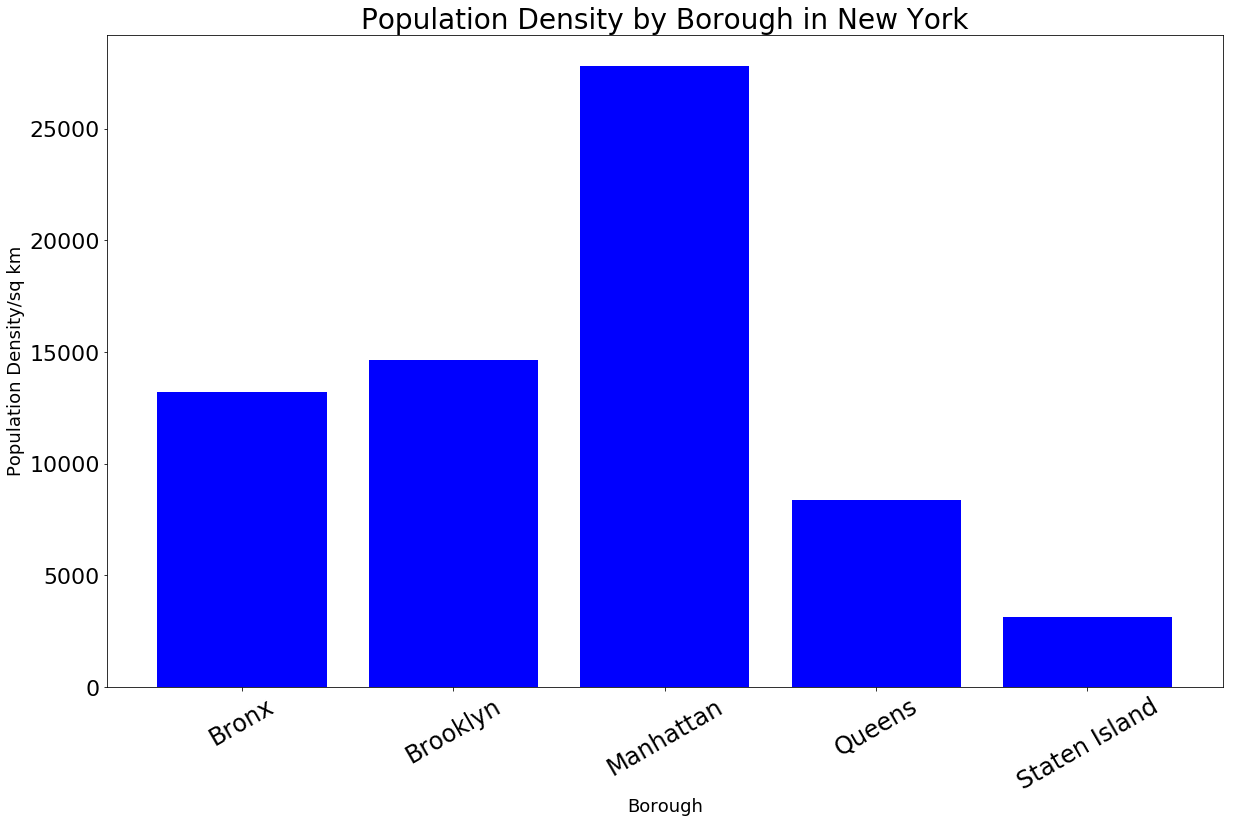

In [114]:
#show bar graph of Population density of New York
plt.figure(figsize = (20,12))
plt.bar(dfn3['Borough'], dfn3['Population Density/sq km'], color = 'blue')
plt.title("Population Density by Borough in New York", fontsize = '28')
plt.xlabel('Borough', fontsize = '18')
plt.ylabel('Population Density/sq km', fontsize = '18')
plt.xticks(fontsize='24', rotation ='30')
plt.yticks(fontsize='22')
plt.savefig('pdny.jpg')
plt.show()

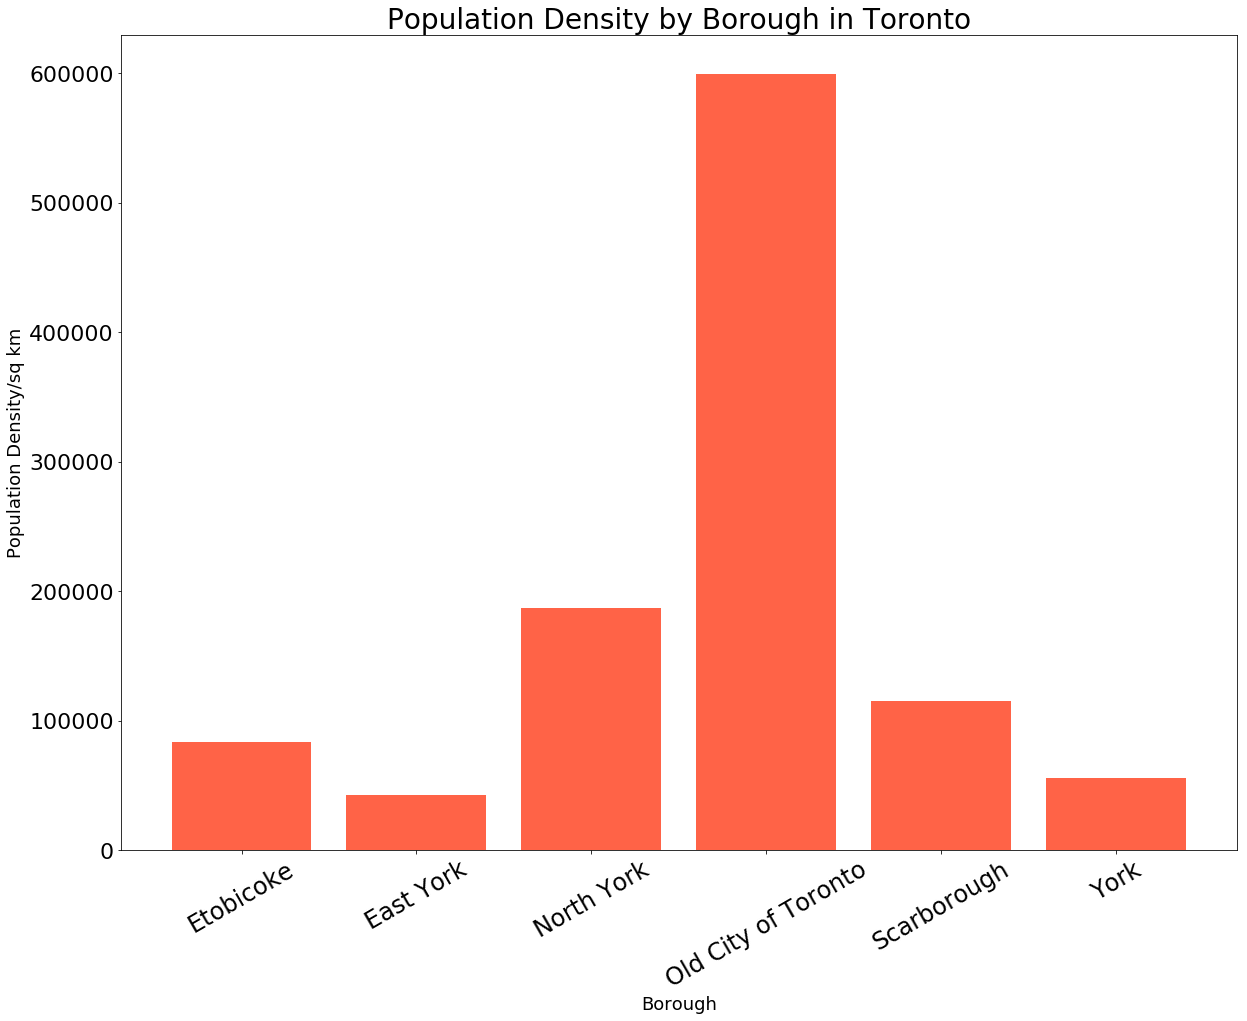

In [83]:
#Show bar graph of Population Density/sq km of Toronto
plt.figure(figsize = (20,15))
plt.bar(dft_2['Borough'], dft_2['Population Density/sq km'], color = 'tomato')
plt.title("Population Density by Borough in Toronto", fontsize = '28')
plt.xlabel('Borough', fontsize = '18')
plt.ylabel('Population Density/sq km', fontsize = '18')
plt.xticks(fontsize='24', rotation ='30')
plt.yticks(fontsize='22')
plt.savefig('pdtor.jpg')
plt.show()

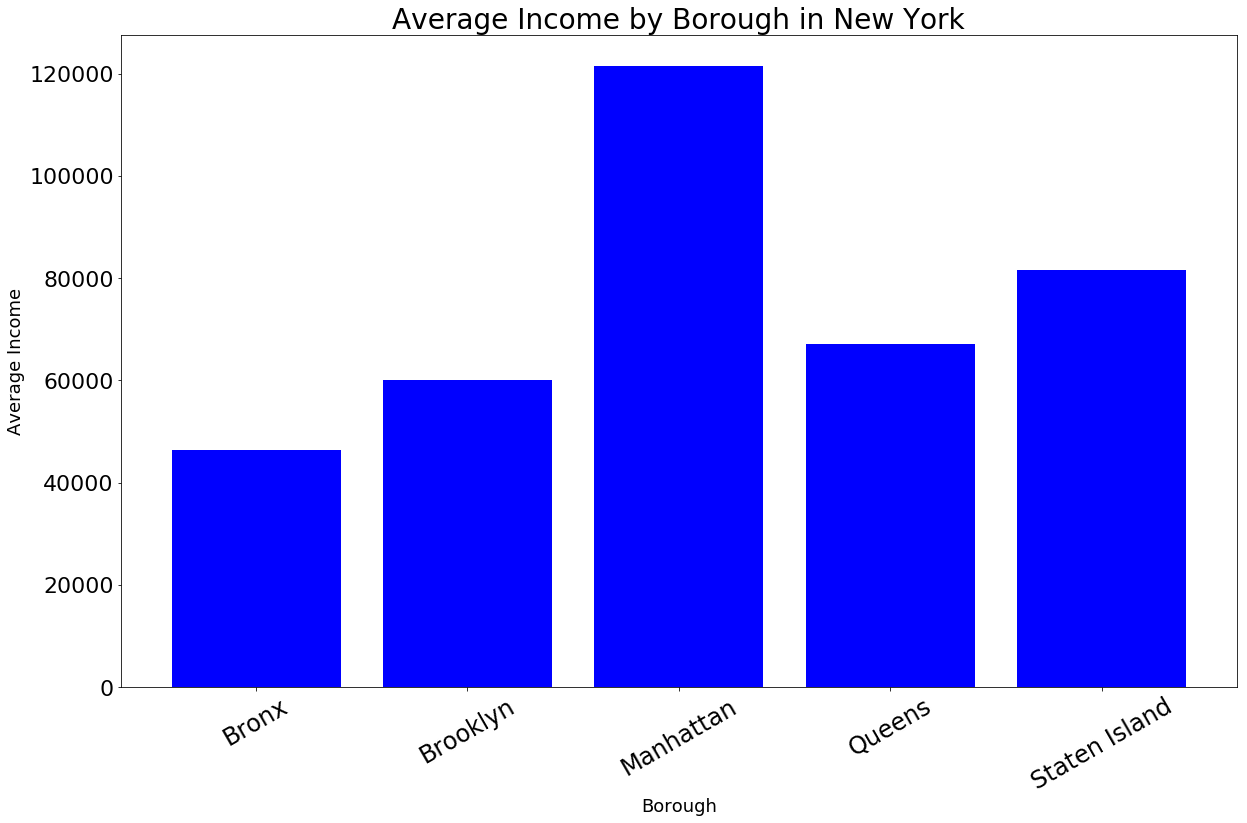

In [115]:
#Show bar chart of average income of New York
plt.figure(figsize = (20,12))
plt.bar(dfn3['Borough'], dfn3['Average Income'], color = 'blue')
plt.title("Average Income by Borough in New York", fontsize = '28')
plt.xlabel('Borough', fontsize = '18')
plt.ylabel('Average Income', fontsize = '18')
plt.xticks(fontsize='24', rotation ='30')
plt.yticks(fontsize='22')
plt.savefig('ainy.jpg')
plt.show()

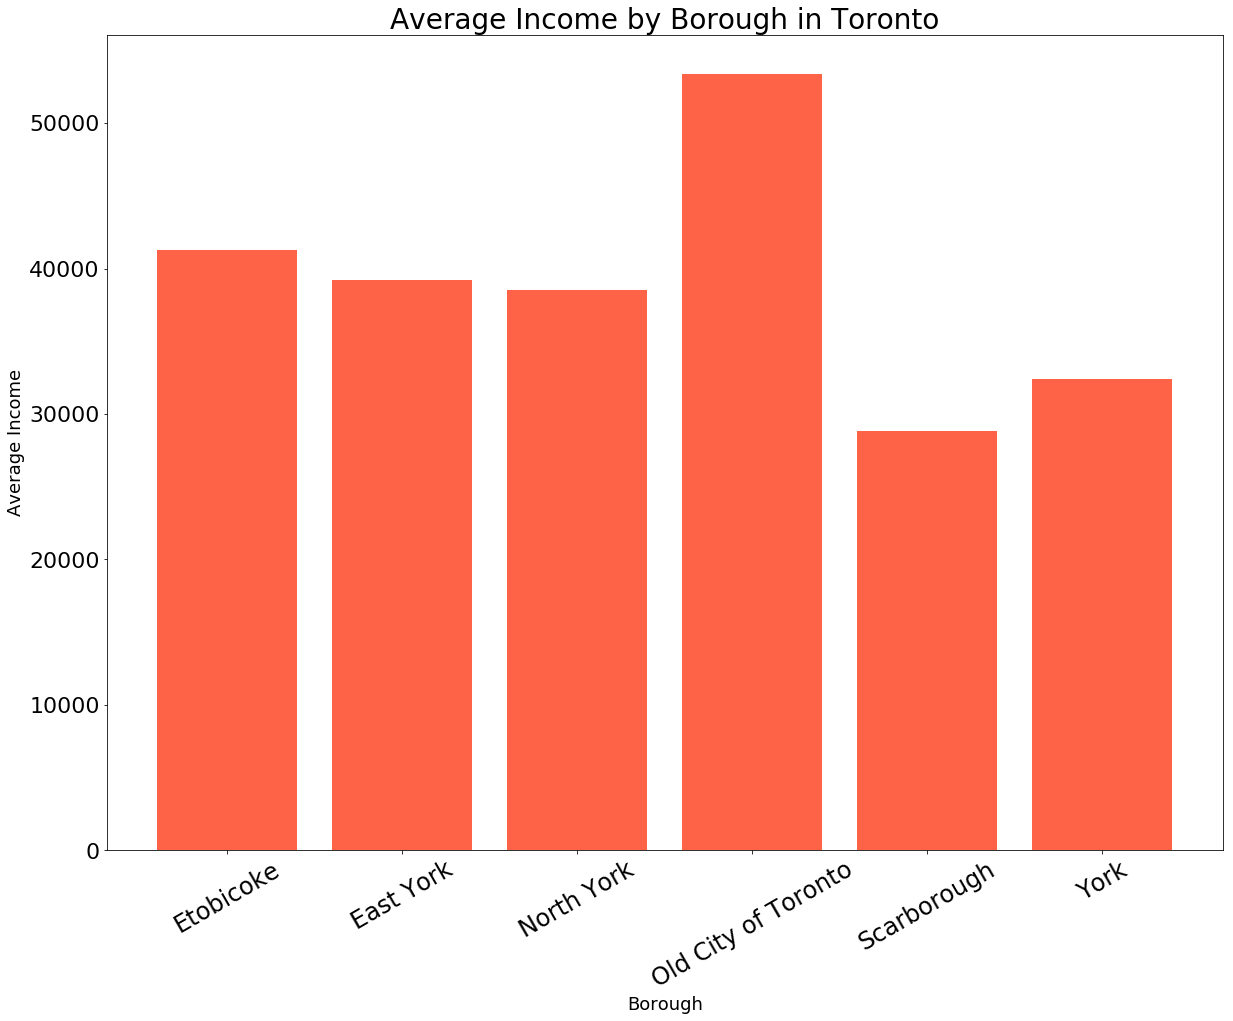

In [86]:
#Show bar chart of average income of Toronto
plt.figure(figsize = (20,15))
plt.bar(dft_2['Borough'], dft_2['Average Income'], color = 'tomato')
plt.title("Average Income by Borough in Toronto", fontsize = '28')
plt.xlabel('Borough', fontsize = '18')
plt.ylabel('Average Income', fontsize = '18')
plt.xticks(fontsize='24', rotation ='30')
plt.yticks(fontsize='22')
plt.savefig('aitor.jpg')
plt.show()